In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import struct
import pandas as pd
import seaborn as sns
from math import e
sns.set(rc={'figure.figsize':(24, 13.5)}, font_scale = 2.7)


In [196]:
name = 'Picccard'
direction = 'negx'
#name = 'argos-constanca'
#direction = 'posy'
#name = 'argos-felix'
#direction = 'negy'
name = 'argos-toyger'
#direction = 'posy'
#name = 'euler_explosion'
#direction = 'negy'
#name = 'flight_2'
#direction = 'posy'
#name = 'Helvetia'

log = '../../cats-logs/log_parsing/output/' + name + '/processed/'
log_imu = log + name + ' - imu_processed.csv'
log_baro = log + name + ' - baro_processed.csv'
log_filtered = log + name + ' - filtered_data_info_processed.csv'

imu_data_df = pd.read_csv(log_imu) 
baro_data_df = pd.read_csv(log_baro) 
filtered_data_df = pd.read_csv(log_filtered) 

imu_0 = imu_data_df.loc[imu_data_df['id'] == 'IMU0']
imu_1 = imu_data_df.loc[imu_data_df['id'] == 'IMU1']

baro_0 = baro_data_df.loc[baro_data_df['id'] == 'BARO0']
baro_1 = baro_data_df.loc[baro_data_df['id'] == 'BARO1']
baro_2 = baro_data_df.loc[baro_data_df['id'] == 'BARO2']
print(time)


Empty DataFrame
Columns: [Unnamed: 0, ts, id, Gx, Gy, Gz, Ax, Ay, Az]
Index: []


In [309]:
import numpy as np
Ts = 1/100
signal_size = 5000
raw_pressure_post = np.zeros(signal_size)
t_post = np.zeros(signal_size)



for k in range(signal_size):
    raw_pressure_post[k] = float(baro_0.iloc[k].P)/3 + float(baro_1.iloc[k].P)/3 + float(baro_2.iloc[k].P)/3
    t_post[k] = imu_0.iloc[k].ts
        
num_pre_flight = 1
pre_start_t = np.zeros(num_pre_flight)
raw_pressure = np.ones(num_pre_flight)
pre_start_t[num_pre_flight-1] = t_post[0]-0.01
for i in range(num_pre_flight-1):
    pre_start_t[num_pre_flight-2-i] = pre_start_t[num_pre_flight-1-i]-0.01
raw_pressure = np.concatenate((raw_pressure*np.mean(raw_pressure_post[1:2]), raw_pressure_post))
t = np.concatenate((pre_start_t, t_post))

max(velocity_new)

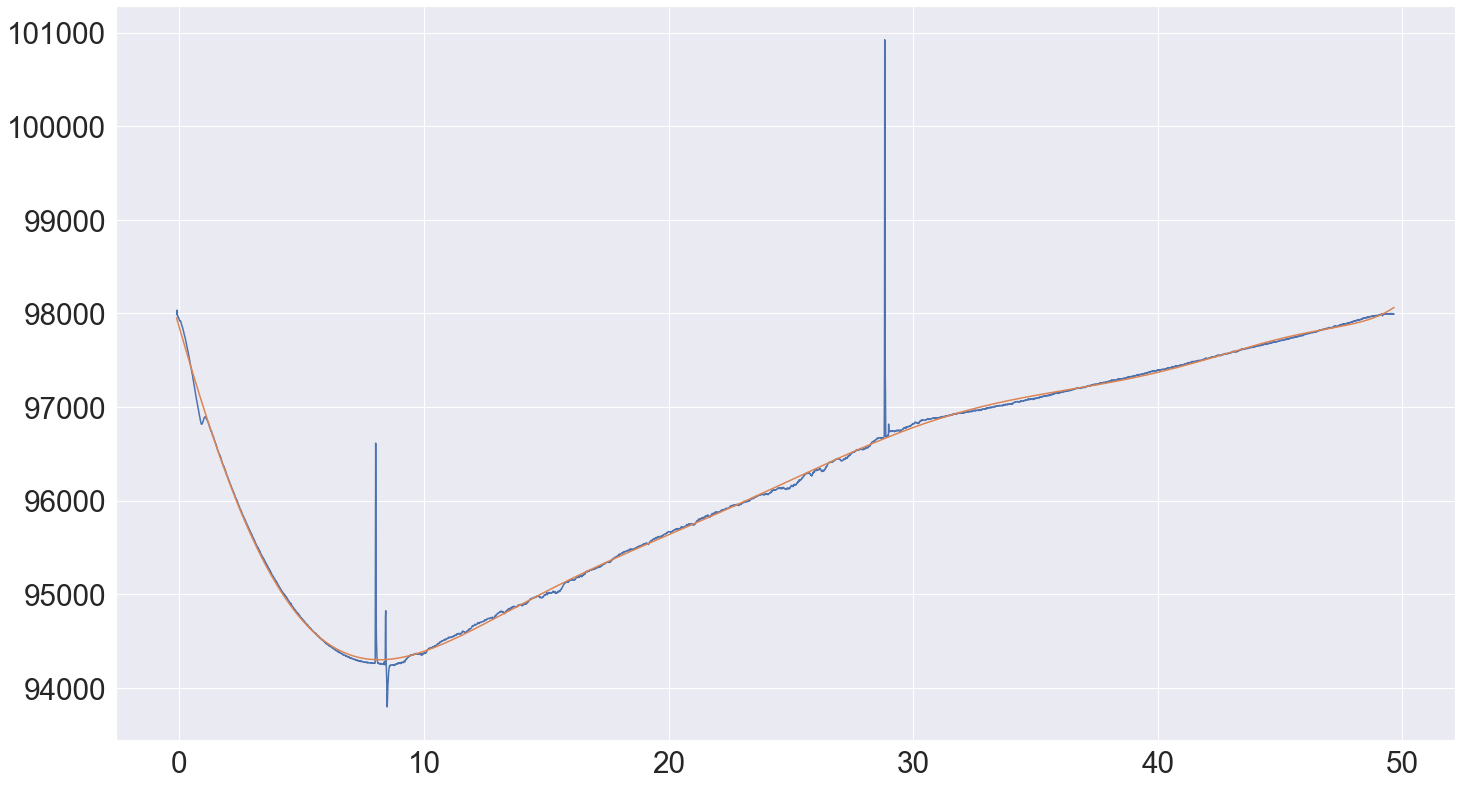

In [310]:
start = 23;
fit = np.polyfit(t[start:], raw_pressure[start:],10, rcond=None, full=False, w=None, cov=False)
fitted_curve = np.polyval(fit, t)
plt.plot(t[start:], raw_pressure[start:])
plt.plot(t[start:],fitted_curve[start:])
plt.show()

In [315]:
signal_size = 140

raw_acc_x_post = np.zeros(signal_size)
raw_acc_y_post = np.zeros(signal_size)
raw_acc_z_post = np.zeros(signal_size)
t_post = np.zeros(signal_size)



for k in range(signal_size):

    raw_acc_x_post[k] = (imu_0.iloc[k].Ax + imu_1.iloc[k].Ax)/2
    raw_acc_y_post[k] = (imu_0.iloc[k].Ay + imu_1.iloc[k].Ay)/2
    raw_acc_z_post[k] = (imu_0.iloc[k].Az + imu_1.iloc[k].Az)/2
    t_post[k] = imu_0.iloc[k].ts
    
num_pre_flight = 1
pre_start_t = np.zeros(num_pre_flight)
raw_acc_x = np.ones(num_pre_flight)
raw_acc_y = np.ones(num_pre_flight)
raw_acc_z = np.ones(num_pre_flight)
pre_start_t[num_pre_flight-1] = t_post[0]-0.01
for i in range(num_pre_flight-1):
    pre_start_t[num_pre_flight-2-i] = pre_start_t[num_pre_flight-1-i]-0.01
raw_acc_x = np.concatenate((raw_acc_x*np.mean(raw_pressure_post[1:2]), raw_acc_x_post))
raw_acc_y = np.concatenate((raw_acc_y*np.mean(raw_pressure_post[1:2]), raw_acc_y_post))  
raw_acc_z = np.concatenate((raw_acc_z*np.mean(raw_pressure_post[1:2]), raw_acc_z_post))
t = np.concatenate((pre_start_t, t_post))

F:\Tools\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


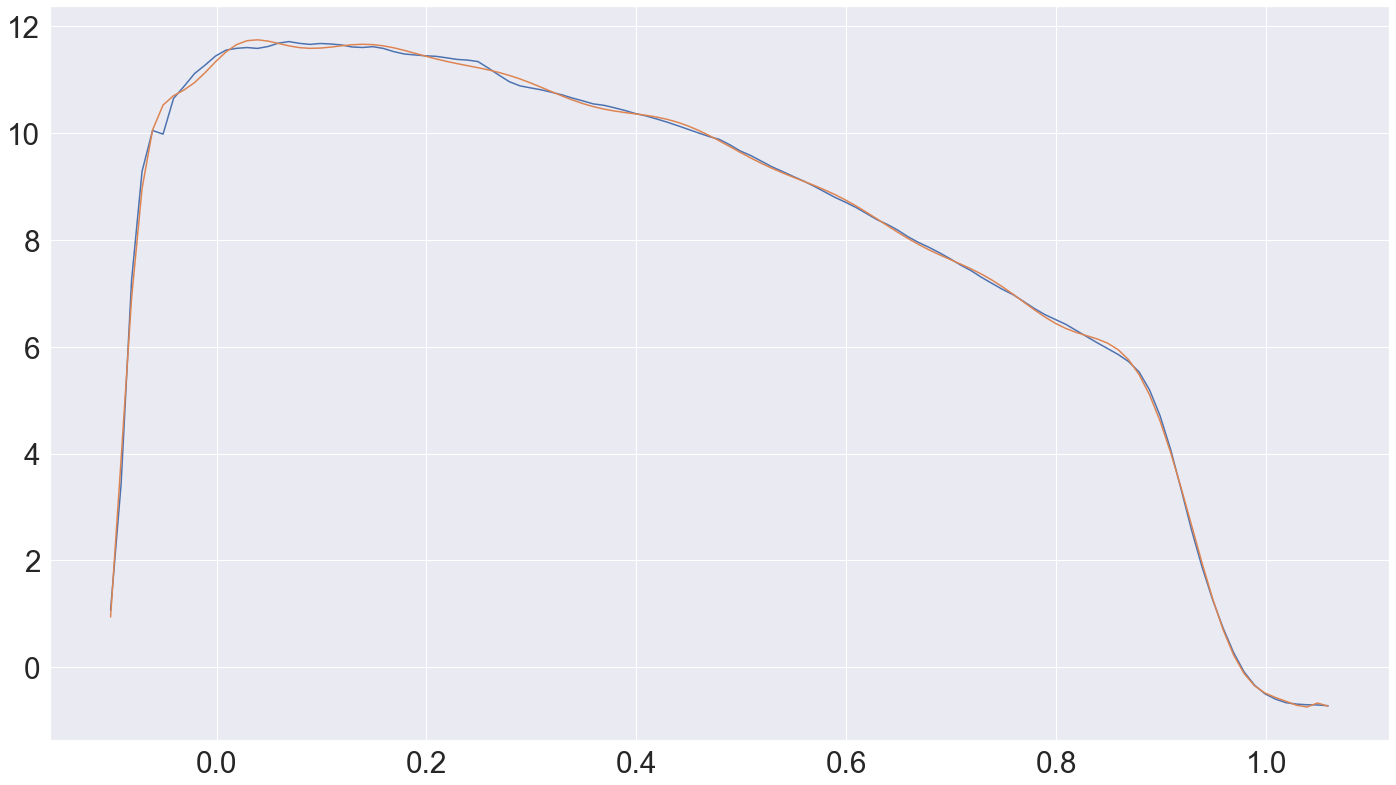

[-5.15013908e+09  3.42128684e+10 -8.40484061e+10  7.36455067e+10
  3.63363267e+10 -8.02355943e+10 -3.96796737e+10  7.96307149e+10
  6.27311673e+10 -7.21450803e+10 -9.17633174e+10  6.17159568e+10
  1.19959809e+11 -6.50337573e+10 -1.44159491e+11  1.19119413e+11
  1.27544457e+11 -2.82144130e+11  2.35070854e+11 -1.14973843e+11
  3.52232121e+10 -6.33439933e+09  4.23929458e+08  6.96392736e+07
 -1.70555379e+07  9.84856277e+05  5.30128216e+04 -6.07148537e+03
 -1.22144961e+02  1.98686419e+01  1.13540999e+01]


In [318]:
start = 24;
fit = np.polyfit(t[start:], raw_acc_y[start:],30, rcond=None, full=False, w=None, cov=False)
fitted_curve = np.polyval(fit, t)
plt.plot(t[start:], raw_acc_y[start:])
plt.plot(t[start:],fitted_curve[start:])
plt.show()
print(fit)